In [2]:
import numpy as np # برای عملیات عددی و کار با آرایه ها
import pandas as pd # به عنوان فریم ورک
import matplotlib.pyplot as plt # برای مصور سازی خروجی ها و نمودار ها
from sklearn.datasets import load_digits # دیتاست اعداد دست نویس 
from sklearn.cluster import KMeans # کی مینز
from sklearn.preprocessing import StandardScaler # استاندارد اسکیلر برای مدل های که بر اساس فاصله عمل میکنند ودر کار با فاصله اقلیدسی واجب است 
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score,normalized_mutual_info_score 
from sklearn.metrics import confusion_matrix,accuracy_score
from scipy.optimize import linear_sum_assignment


➖➖➖➖➖➖➖➖➖➖
shape of each sample : 64 pixels means 8x8

➖➖➖➖➖➖➖➖➖➖
frequent class : target
3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: count, dtype: int64
➖➖➖➖➖➖➖➖➖➖
count of classes : 	10
➖➖➖➖➖➖➖➖➖➖
number of samples : 1797



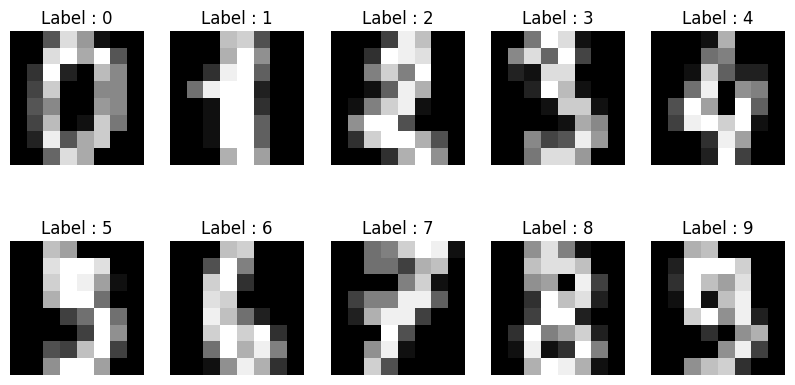

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [3]:


digits = load_digits(as_frame=True) # با این روش خروجی به صورت دیتا فریم خواهد بود 

digits_df = digits.frame # البته به شرطی که به این صورت استفاده کنیم 

true_y = digits_df['target'] # برچسب داده ها
digits_df = digits_df.drop('target',axis=1) # حذف برچسب از دیتاست


print(f"➖➖➖➖➖➖➖➖➖➖\nshape of each sample : {digits_df.iloc[0,:].shape[0]} pixels means 8x8\n") # گزارشی از شکل هر سمپل 

print(f"➖➖➖➖➖➖➖➖➖➖\nfrequent class : {true_y.value_counts()}\n➖➖➖➖➖➖➖➖➖➖\ncount of classes : \t{len(true_y.value_counts())}") # تعداد کلاس های موجود در دیتاست 

print(f"➖➖➖➖➖➖➖➖➖➖\nnumber of samples : {digits_df.shape[0]}\n")

image = load_digits() # Mnist is 28 * 28 and has more resolution so is better for plotting but our project will use digits from sklearn
fig , axes = plt.subplots(2,5,figsize = (10,5))

for i,ax in enumerate(axes.flat): # فلت باعث میشه اکسز ها به صورت لیست خطی بشن و حلقه زدن روشون راحت تر میشه 
    ax.imshow(image.images[i],cmap ='gray')
    ax.set_title(f"Label : {image.target[i]}")
    ax.axis('off')
plt.show()


display(digits_df.head(5)) # هر ردیف گزارشی از عدد هر پیکسل تصویر است 



In [4]:
def kmeans_tester(df,k):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(scaled_data)
    labels = kmeans.labels_
    wcss = kmeans.inertia_
    sil_score = silhouette_score(scaled_data,labels)
    return labels , wcss , sil_score

In [5]:
k_list = [6,7,8,9,10,11,12,13,14]
k_df = pd.DataFrame()
k_metrics = pd.DataFrame(index=['sil score','wcss'])

for i,k in enumerate(k_list):
    result = kmeans_tester(df = digits_df, k=k)
    labels = result[0]
    wcss = result[1]
    sil_score = result[2]

    k_df[f'k = {k}'] = labels
    k_metrics[f'k {k}'] = [sil_score,wcss]


In [6]:
k_df

,k = 6,k = 7,k = 8,k = 9,k = 10,k = 11,k = 12,k = 13,k = 14
0,1,1,5,5,5,5,5,5,5
1,2,2,6,6,9,9,6,6,10
2,3,3,6,6,9,9,6,6,10
3,4,4,7,7,7,7,7,7,7
4,5,5,2,2,2,10,10,10,13
...,...,...,...,...,...,...,...,...,...
1792,4,4,7,7,7,7,7,7,7
1793,1,1,5,5,5,5,5,5,5
1794,2,2,6,6,9,9,6,6,6
1795,4,4,7,7,7,7,7,7,9


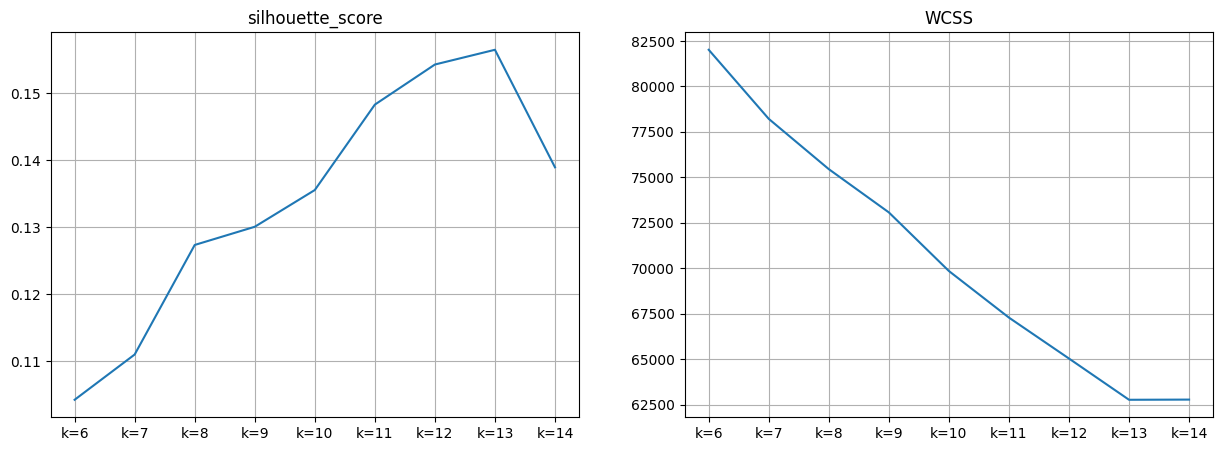

In [7]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(k_list,k_metrics.loc['sil score',:])
plt.title('silhouette_score')
plt.xticks(k_list, [f"k={val}" for val in k_list])
plt.grid(True)
plt.subplot(1,2,2)
plt.plot(k_list,k_metrics.loc['wcss',:])
plt.title('WCSS')
plt.xticks(k_list, [f"k={val}" for val in k_list])
plt.grid(True)
plt.show()

در نمودار سیلووت اسکور بیشترین امتیاز یعنی بیشترین تعلق نقاط به خوشه در کا=13 مشاهده میشه 

در نمودار تابع هدف در کا=12 تا کا=13 دیگه تغییر قابل توجهی مشاهده نمیشه به اصطلاح از کا=13 دیگه مجموع مربعات فاصله نقاط از مرکز کاهش معنا داری نداره  

با توجه به دو نمودار و با توجه به اینکه نمی خواهم با تکیه لیبل های موجود در دیتاست تصمیم گیری کنم 
عدد 13 را به عنوان تعداد خوشه های الگوریتم انتخاب میکنم 

# اینیتیالیزیشن های مختلف

k-means++

در این روش سعی میشه با وجودی که مراکز اولیه تصادفی هستن ولی فاصله داشتن باشن تا سریع تر همگرا بشن و الگوریتم با تکرار کمتر سینتروید ها رو سر جای درست ببره 

random

در این حالت مراکز اولیه رندوم انتخاب میشن فاصله درشون دخیل نیست  غیر از این مورد تفاوت دیگه ای تو فرایند آپدیت کردن مراکز خوشه ها با روش قبلی وجود نداره 

n_init

این پارامتر میگه الگوریتم چند بار از اول اجرا بشه ، ممکنه با شروع و تعیین دوباره مقادیر تصادفی نتیجه بهتری پیدا کنیم 

In [8]:
def kmeans_tester_new(df,k,init,n_init):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)
    kmeans = KMeans(n_clusters=k,n_init=n_init,init=init,random_state=50)
    kmeans.fit(scaled_data)
    labels = kmeans.labels_
    wcss = kmeans.inertia_
    sil_score = silhouette_score(scaled_data,labels)
    return labels , wcss , sil_score

In [9]:
# initialization = kmeans ++
kmeans_plus_label = pd.DataFrame()
kplus_metrics = pd.DataFrame(index=['wcss','sil score'])
k = 13
n_init_list = range(5,16)

for i,n_init in enumerate(n_init_list):
    result = kmeans_tester_new(df=digits_df,n_init=n_init,init='k-means++',k=k)
    labels = result[0]
    wcss = result[1]
    sil_score = result[2]
    kmeans_plus_label[f'n-init {n_init}'] = labels
    kplus_metrics[f'n-init {n_init}'] = [wcss,sil_score]


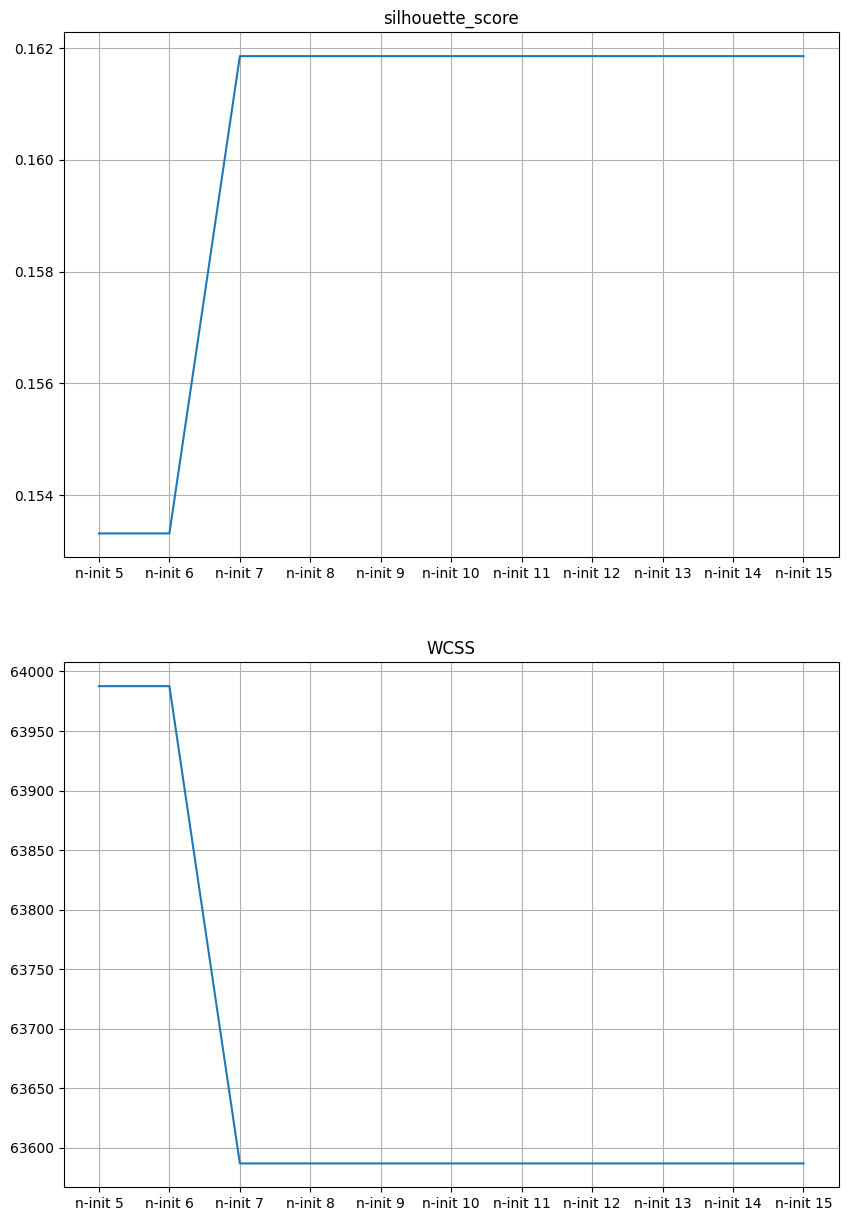

In [10]:
plt.figure(figsize=(10,15))
plt.subplot(2,1,1)
plt.plot(n_init_list,kplus_metrics.loc['sil score',:])
plt.title('silhouette_score')
plt.xticks(n_init_list, [f"n-init {val}" for val in n_init_list])
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(n_init_list,kplus_metrics.loc['wcss',:])
plt.title('WCSS')
plt.xticks(n_init_list, [f"n-init {val}" for val in n_init_list])
plt.grid(True)
plt.show()

برای رسم این دو نمودار تعداد زیادی رندوم استیت انتخاب کردم و بهترین و واضح ترین و معنا دارن ترین خروجی مربوط به عدد 50 بود 

به وضوح قابل مشاده هست که با روش کی مینز ++ بعد از رسیدن از 6 به 7 تکرار به شدت فاصله درون خوشه ای کاهش پیدا میکند و همبستگی اعضا خوشه ها با درون خوشه ها افزایش پیدا میکند 

اعداد به دست امده از این آزمایش رندوم استیت 50 و 7 تکرار برای الگوریتم است

In [ ]:
# initialization = random
random_label = pd.DataFrame()
random_metrics = pd.DataFrame(index=['wcss','sil score'])
k = 13
n_init_list = range(5,16)

for i,n_init in enumerate(n_init_list):
    result = kmeans_tester_new(df=digits_df,n_init=n_init,init='random',k=k)
    labels = result[0]
    wcss = result[1]
    sil_score = result[2]
    random_label[f'n-init {n_init}'] = labels
    random_metrics[f'n-init {n_init}'] = [wcss,sil_score]


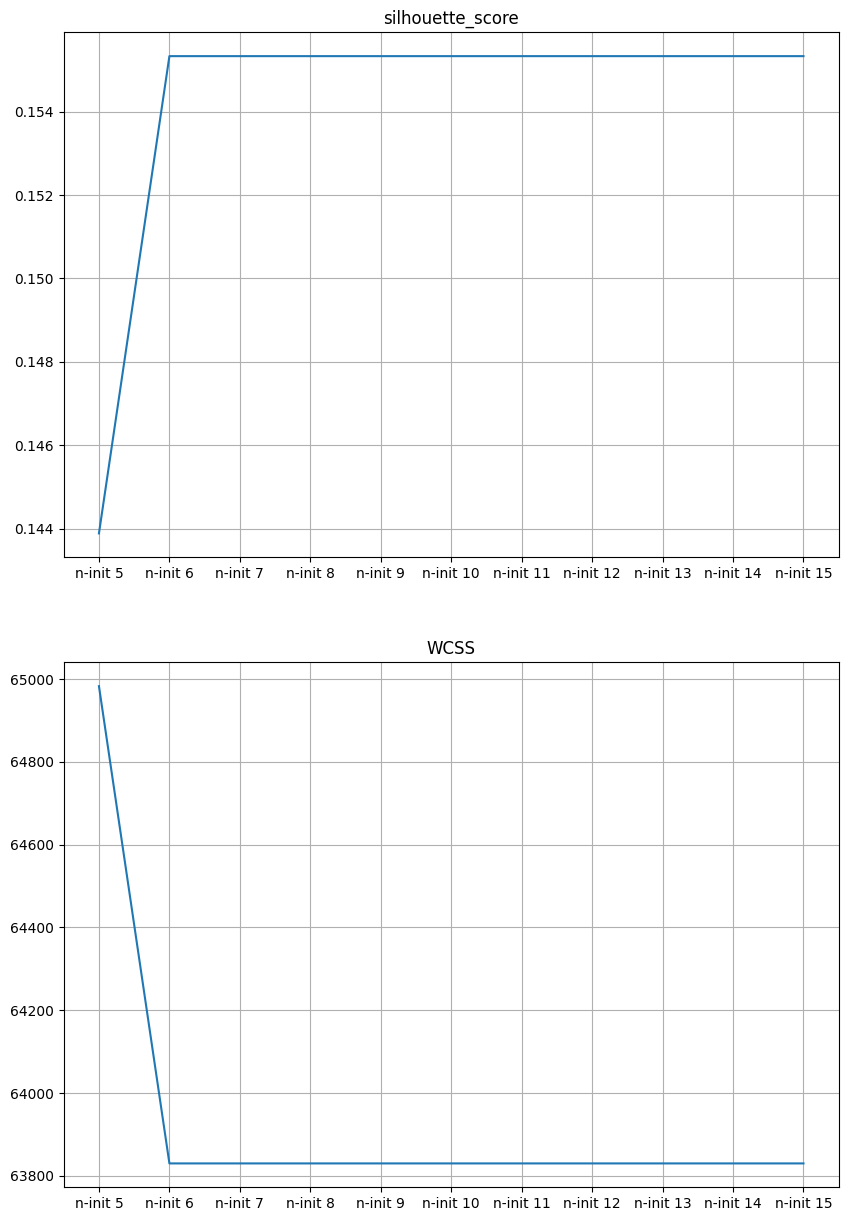

In [12]:
plt.figure(figsize=(10,15))
plt.subplot(2,1,1)
plt.plot(n_init_list,random_metrics.loc['sil score',:])
plt.title('silhouette_score')
plt.xticks(n_init_list, [f"n-init {val}" for val in n_init_list])
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(n_init_list,random_metrics.loc['wcss',:])
plt.title('WCSS')
plt.xticks(n_init_list, [f"n-init {val}" for val in n_init_list])
plt.grid(True)
plt.show()

n-init = (5,16)

هر دو معیار برای هر دو حالت با تعداد اینیت های مختلف تست شده و نتایج نمایش داده شده 

برای رسم این دو نمودار تعداد زیادی رندوم استیت انتخاب کردم و بهترین و واضح ترین و معنا دارن ترین خروجی مربوط به عدد 50 بود 

به وضوح قابل مشاده هست که با روش کی مینز ++ بعد از رسیدن از 6 به 7 تکرار به شدت فاصله درون خوشه ای کاهش پیدا میکند و همبستگی اعضا خوشه ها با درون خوشه ها افزایش پیدا میکند 

اعداد به دست امده از این آزمایش رندوم استیت 50 و 7 تکرار برای الگوریتم است

Kmeans  غیر کانوکس هست 

یعنی اینکه  پر از مینیمم های محلی هست ! من با تغییر رندوم استیت و موارد متعدد دیگه میتونم به کلی دقت مختلف و نتایج مختلف برسم اما توابعی که کانوکس هستن از هر جا که شروع کنیم به مینیمم گلوبال میرسیم

In [13]:
def kmeans_tester_update(df,k,init,n_init):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)
    kmeans = KMeans(n_clusters=k,n_init=n_init,init=init,random_state=50)
    kmeans.fit(scaled_data)
    labels = kmeans.labels_
    wcss = kmeans.inertia_
    sil_score = silhouette_score(scaled_data,labels)
    return labels , wcss , sil_score

In [14]:
# k = 6 to 14 |  init = kmeans++ | n_init = 7 | random state = 50
k = 13
result = kmeans_tester_update(df=digits_df,k=k,init='k-means++',n_init=7)
y_hat = result[0]





ari = adjusted_rand_score(true_y,y_hat)
nmi = normalized_mutual_info_score(true_y,y_hat)

print(f"adjusted_rand_score: {ari}")
print(f"normalized_mutual_info_score: {nmi}")

adjusted_rand_score: 0.5510924564605261
normalized_mutual_info_score: 0.6860653798834507


In [15]:
def hungarian_match(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)

    # Hungarian => minimize cost
    row_ind, col_ind = linear_sum_assignment(-cm)

    mapping = dict(zip(col_ind, row_ind))

    y_pred_aligned = np.array([mapping[label] for label in y_pred])

    return y_pred_aligned,mapping

In [16]:
k_list = [6,7,8,9,10,11,12,13,14]
labels_df = pd.DataFrame()
for i,k in enumerate(k_list): 
    result = kmeans_tester_update(df=digits_df,k=k,init='k-means++',n_init=7)
    
    labels_df[f"k {k}"] = result[0]


ari_nmi_df = pd.DataFrame(index=["ari","nmi","acc"])

for i,col in enumerate(labels_df.columns):
    ari = adjusted_rand_score(true_y,labels_df.iloc[:,i])
    nmi = normalized_mutual_info_score(true_y,labels_df.iloc[:,i])
    result = hungarian_match(true_y, labels_df.iloc[:,i])
    acc = accuracy_score(true_y,result[0])
    ari_nmi_df[f'{col}'] = [ari,nmi,acc]

display(ari_nmi_df)

print(result[1])

,k 6,k 7,k 8,k 9,k 10,k 11,k 12,k 13,k 14
ari,0.334621,0.413128,0.403284,0.568244,0.569841,0.555089,0.525456,0.551092,0.558563
nmi,0.501424,0.577198,0.587421,0.703263,0.698238,0.686748,0.652953,0.686065,0.691114
acc,0.444073,0.558152,0.542014,0.705064,0.702838,0.675014,0.643851,0.670006,0.675014


{np.int64(2): np.int64(0), np.int64(8): np.int64(1), np.int64(10): np.int64(2), np.int64(3): np.int64(3), np.int64(13): np.int64(4), np.int64(1): np.int64(5), np.int64(0): np.int64(6), np.int64(4): np.int64(7), np.int64(5): np.int64(8), np.int64(7): np.int64(9), np.int64(6): np.int64(10), np.int64(9): np.int64(11), np.int64(11): np.int64(12), np.int64(12): np.int64(13)}


بالا ترین امتیاز ها برای 10 خوشه و  9 خوشه بوده 

wcss, sil score معیار هایی که بر اساس فشردگی و فاصله خوشه ها از مرکز کار میکنند بهترین حالت را روی 13 خوشه نمایش دادند 

معیار هایی هستند که بر اساس مقایسه با خوشه های واقعی عمل کردند و در این حالت بهترین عملکرد روی 10 خوشه به نمایش در امد  ari , nmi 

Confusion Matrix:


,A,B,C
A,41,1,4
B,1,26,3
C,4,1,19


row_ind [0 1 2],col_ind [0 1 2]

label_to_index {'A': 0, 'B': 1, 'C': 2}

Mapped predictions: [np.int64(0), np.int64(2), np.int64(1), np.int64(1), np.int64(2), np.int64(0), np.int64(0), np.int64(2), np.int64(2), np.int64(1)]


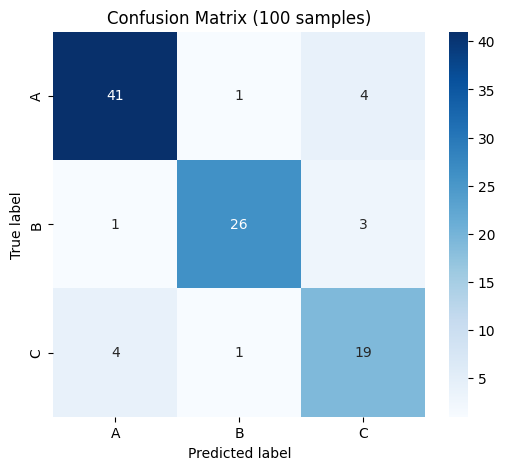

In [22]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import linear_sum_assignment

np.random.seed(42)


y_true = np.random.choice(['A', 'B', 'C'], size=100, p=[0.4, 0.35, 0.25])

y_pred = []
for y in y_true:
    if np.random.rand() < 0.75:
        y_pred.append(y)
    else:
        y_pred.append(np.random.choice(['A', 'B', 'C']))

y_pred = np.array(y_pred)

labels = ['A', 'B', 'C']
cm = confusion_matrix(y_true, y_pred, labels=labels)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

print("Confusion Matrix:")
display(cm_df)

row_ind, col_ind = linear_sum_assignment(-cm)
print(f'row_ind {row_ind},col_ind {col_ind}\n')

label_to_index = {label: i for i, label in enumerate(labels)}
print('label_to_index' ,label_to_index)

# نگاشت بهینه
mapping = dict(zip(col_ind, row_ind))

# اعمال نگاشت روی y_pred
y_pred_mapped = [mapping[label_to_index[y]] for y in y_pred]

print("\nMapped predictions:", y_pred_mapped[:10])  # نمونه خروجی

# رسم confusion matrix برای دید بصری
plt.figure(figsize=(6,5))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix (100 samples)")
plt.show()

این خروجی ها نشون میده تابع چی کار میکنه 

# نتیجه گیری 

دو روش برای تفکیک داده ها وجود داره ، با لیبل و بدون لیبل یا همون مقدار حقیقی هدف 

ما اگر لیبل داشته باشیم قطعا سراغ روش های بدون ناظر نمی ریم 

روش های بدون ناظر مثل حرکت توی تاریکی و پیدا کردن چیز ها با  لمس کردن 
راهی برای سنجش دقت واقعی وجود نداره 

تنها چیزی که داریم پیدا کردن خوشه هایی که فاصله داخلیشون کم و فاصله بیرونیشون زیاد بشه 

در مورد دیتا ست اعداد که ترتیب اهمیت بسیار زیادی داره روش های خوشه بندی به درستی عمل نمی کنن هم به علت اینکه بعضی اعداد ممکن مقادیر پیکسل های نزدیک به هم داشته باشن 

هم به علت اینکه عدد خوشه ها دارای هیچ معنا یا ترتیبی نیست فقط و فقط مسئله تفکیک موارد بر اساس شباهت هست 